In [1]:
# Download R libraries for analysis
library(xts)
library(dplyr)
library(ggplot2)
library(quantmod)
library(lubridate)

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



Attaching package: ‘dplyr’


The following objects are masked from ‘package:xts’:

    first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: TTR

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Version 0.4-0 included new data defaults. See ?getSymbols.


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




In [2]:
# Connect to Quandl library
library(Quandl)
my_api <- "xq44Ss4a-fZGqgecyG1o"
Quandl.api_key(my_api)

#### Time Series Analysis (Oil daily price: WTI)

In [17]:
# WTI monthly data
wti_zoo <- Quandl("FRED/DCOILWTICO", 
                    type = "zoo", 
                    collapse = "monthly",  
                    start_date = "1990-01-01", 
                    end_date = "2020-10-01")
# index(WTI) <- seq(mdy('01/01/1990'), mdy(last(index(WTI))), by = 'months')
str(wti_zoo)
wti_ts <- as.ts(wti_zoo)
# head(wti_ts)
is.ts(wti_ts)

‘zooreg’ series from Jan 1990 to Oct 2020
  Data: num [1:370] 22.7 21.6 20.3 18.5 17.5 ...
  Index:  'yearmon' num [1:370] Jan 1990 Feb 1990 Mar 1990 Apr 1990 ...
  Frequency: 12 


[1] TRUE

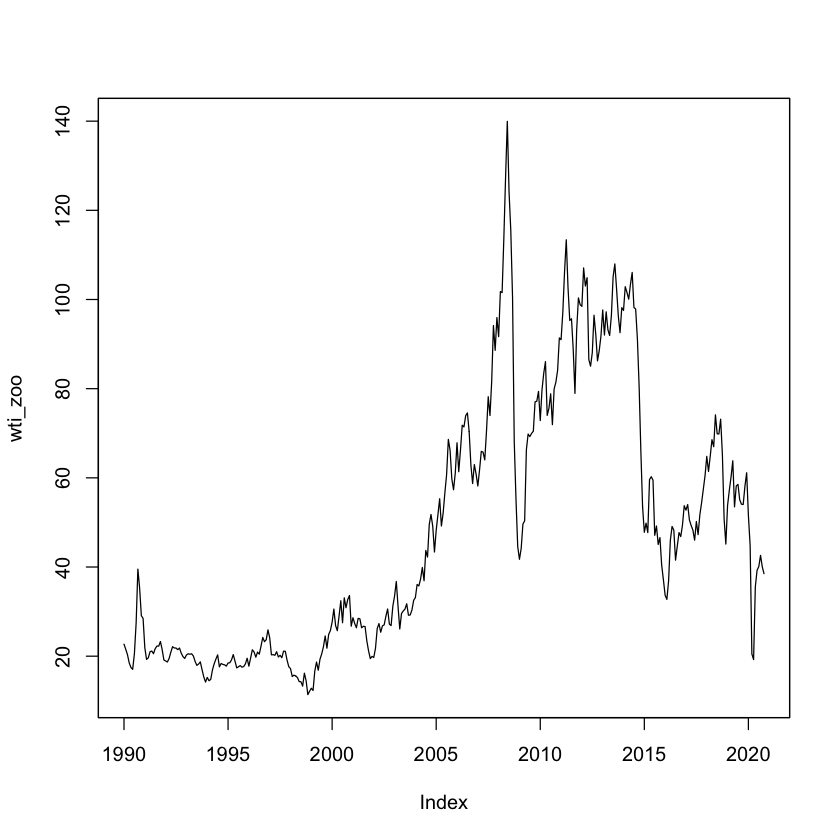

In [18]:
plot(wti_zoo)

Warning message in zoo(rval[i], index(x)[i]):
“some methods for “zoo” objects do not work if the index entries in ‘order.by’ are not unique”
Warning message in zoo(rval[i], index(x)[i]):
“some methods for “zoo” objects do not work if the index entries in ‘order.by’ are not unique”


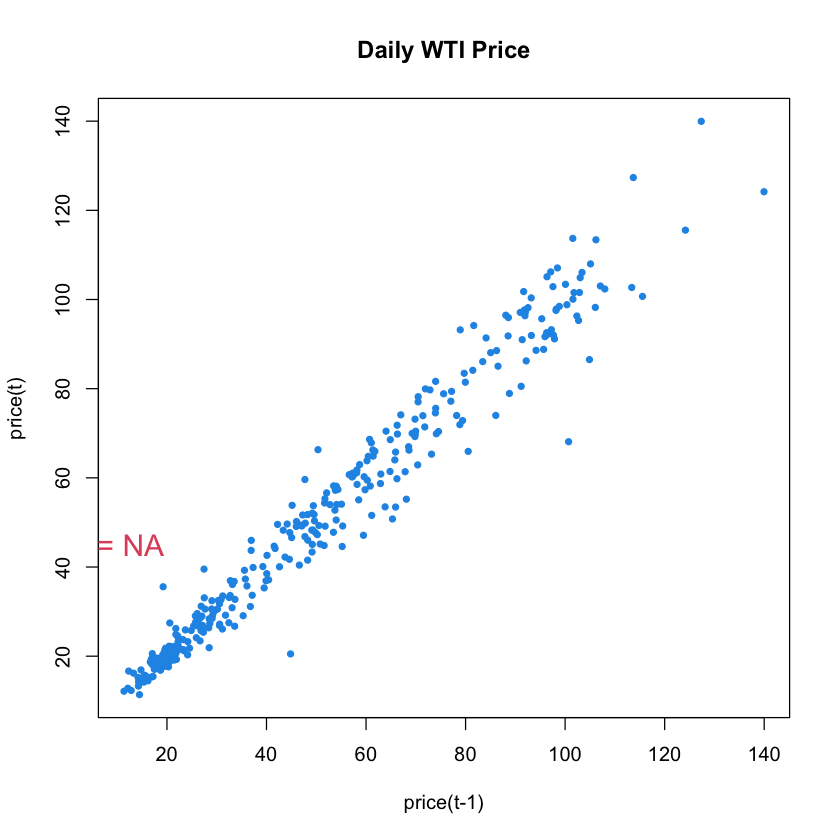

In [42]:
x <- as.numeric(wti_zoo[1:7739])
y <- as.numeric(wti_zoo[2:7740])
plot(x, y, pch=20, col=4,
     main="Daily WTI Price", xlab="price(t-1)",
     ylab = "price(t)")
text(x=6, y=45, col=2, cex=1.5,
     labels=paste("Corr =", round(cor(x, y),2)))

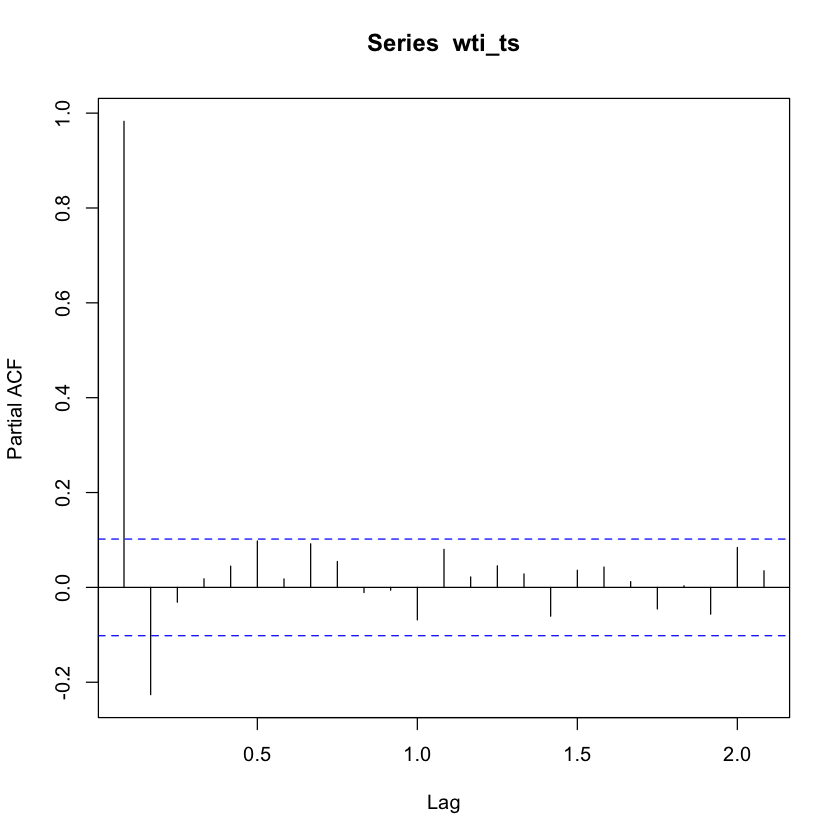

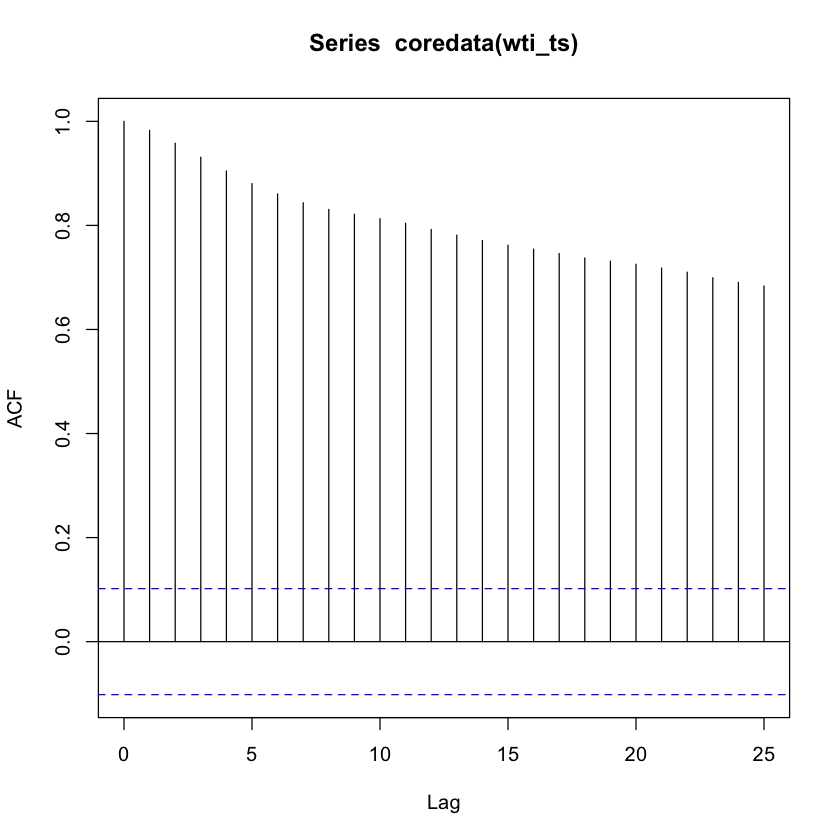

In [37]:
pacf(wti_ts)
acf(coredata(wti_ts))